## Choropleth
Gráfico que muestra un espacio geográfico dividido en regiones claramente definidas. Éstas regiones representan usualmente divisiones geográficas reales (países, provincias, estados, ciudades, barrios, etc). Cada región se pinta de una intensidad de color diferente. La intensidad del color representa una variable numérica relacionada a esa región. Su objetivo es mostrar diferencias de la variable medida entre cada región.

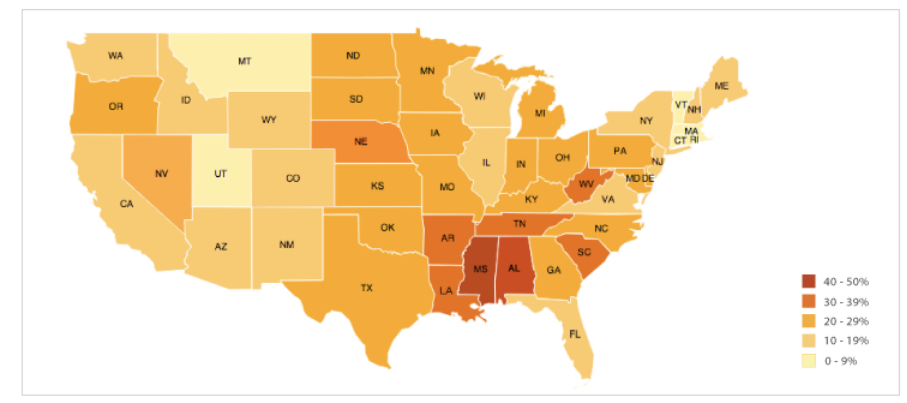

### Qué necesito para hacer un Choropleth?
- Necesito las formas de mis regiones geográficas. Estas pueden llegar a través de:
    - Shapefiles (.shp)
    - GeoJSON (.geojson)
- Tengo que tener la información numérica de lo que quiero graficar asociado a cada forma (Shape)

### Consejos
- Dentro de cada región puedo escribir el valor numérico medido o el nombre de la región.
- Puedo introducir una variable categórica al Choropleth utilizando una tonalidad totalmente diferente dependiendo de mi categoría  (por ejemplot tonalidades rojas para la categoría A, y tonalidades azules para la categpría B). Esto podría dificultar la legibilidad.
- Lo puedo combinar con un mapa de puntos aunque no es recomndable ya que se dificulta la lectura.
- En caso de ser posible, el valor numérico para determinar la intensidad de cada región debería ser normalizado de alguna forma. Por ejemplo, una normalización min-max o un normalización por población. Esto es para evitar que haya solamente uno o dos regiones con una tonalidad intensa cuando mi variable numérica tiene una alta desviación estandar.

## En esta clase

### Datos
Información sobre el número de Tweets publicados en diferentes astados de Venezuela acerca de las elecciones parlamentarias en el 2015.

### Objetivos
1. Encontrar que regiones tuitearon más y que regiones tuitearon menos acerca de las elecciones.

## Referencias
- https://datavizcatalogue.com/ES/metodos/mapa_coropletico.html
- https://plotly.com/python/choropleth-maps/
- https://github.com/lkuffo/data-viz/blob/main/NIVEL3/3_choropleth.ipynb
- https://geojson.io/#map=2/0/20
- https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth_mapbox.html
- https://blog.datawrapper.de/choroplethmaps/

In [2]:
import pandas as pd
import json
import plotly.express as px

In [7]:
f = open('../data/venezuela_tw_pob.geojson')
shapes = json.loads(f.read())
shapes

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'ID_0': 249,
    'ISO': 'VEN',
    'NAME_0': 'Venezuela',
    'ID_1': 1,
    'TYPE_1': '',
    'ENGTYPE_1': '',
    'NL_NAME_1': '',
    'VARNAME_1': '',
    'TWEETS': 94,
    'NOMBRE': 'Amazonas',
    'POBLACION': 189524},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-64.6386051828683, 4.164596014860845],
      [-64.65858708542281, 4.211490651303845],
      [-64.69139687603699, 4.244506157678513],
      [-64.78045202198975, 4.286564127582548],
      [-64.79698026237433, 4.2857229681844675],
      [-64.81770223539382, 4.26511456293149],
      [-64.82485624988864, 4.244085577979472],
      [-64.82189596802871, 4.211911231002885],
      [-64.810548220899, 4.174479637788293],
      [-64.78365899400467, 4.152609493438195],
      [-64.75331610494044, 4.136837754724182],
      [-64.73210075161096, 4.120224856612088],
      [-64.7229732158762, 4.104873697597115],
      [-64.70866518688655, 4.06660094

In [6]:
# relacionamos una variable unica de properties con el geojson
nombres = []
tweets = []
poblacion = []

for shape in shapes['features']:
    properties = shape['properties']
    nombres.append(properties['NOMBRE'])
    tweets.append(properties['TWEETS'])
    poblacion.append(properties['POBLACION'])

df = pd.DataFrame(
    {
        'nombre': nombres,
        'tweets': tweets,
        'poblacion': poblacion,
    }
)
df

nombre  tweets  poblacion
0                 Amazonas      94     189524
1              AnzoÃ¡tegui    2004    2103856
2                    Apure     148     603295
3                   Aragua    4883    2228130
4                  Barinas     963    1063351
5                 BolÃ­var    2998    2069064
6                 Carabobo    3819    2886093
7                  Cojedes     322     502107
8            Delta Amacuro      85     240268
9   Dependencias Federales       0       6500
10        Distrito Capital   10964    2277972
11                 FalcÃ³n    2054    1137324
12                GuÃ¡rico     623     956951
13                    Lara    2894    2234763
14                 MÃ©rida    1998    1018219
15                 Miranda    8415    1018219
16                 Monagas     974    1112541
17           Nueva Esparta    1119     606247
18              Portuguesa     769    1078934
19                   Sucre     752    1117917
20                TÃ¡chira    2481    1376292
21                Trujillo     542     893785
22                  Vargas     731     448894
23                 Yaracuy     410     785125
24                   Zulia    7906    4957765

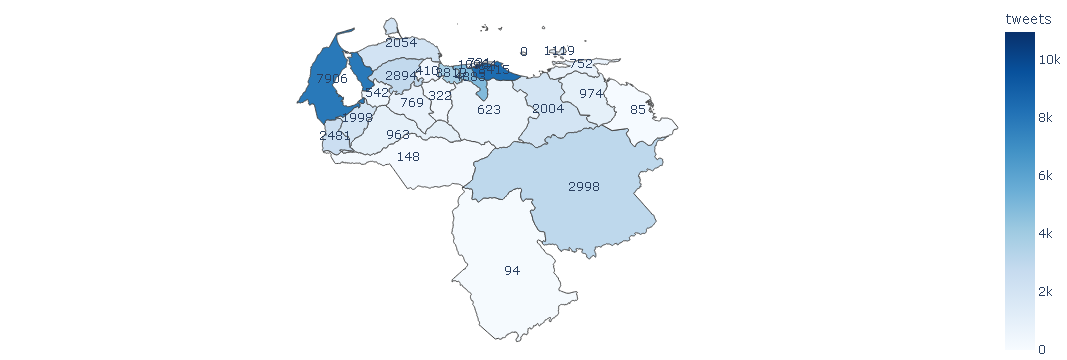

In [14]:
fig = px.choropleth(
    df,
    geojson=shapes,
    locations='nombre',
    featureidkey='properties.NOMBRE',
    color='tweets',
    color_continuous_scale='Blues'    
)

fig.update_layout(
    margin={
        'r': 0, 
        't': 0, 
        'l': 0, 
        'b': 0
    } # para extender el margen del mapa
)

fig.update_geos(
    fitbounds='locations',
    visible=False
)

fig.add_scattergeo(
    geojson=shapes,
    text=df['tweets'],
    mode='text',
    locations=df['nombre'],
    featureidkey='properties.NOMBRE'
)